In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols as sm_ols
from statsmodels.iolib.summary2 import summary_col # nicer tables
import matplotlib.pyplot as plt


In [2]:
housing_df = pd.read_csv("./input_data2/housing_train.csv")

## Part 1: EDA

_Insert cells as needed below to write a short EDA/data section that summarizes the data for someone who has never opened it before._ 
- Answer essential questions about the dataset (observation units, time period, sample size, many of the questions above) 
- Note any issues you have with the data (variable X has problem Y that needs to get addressed before using it in regressions or a prediction model because Z)
- Present any visual results you think are interesting or important

## EDA:
- The data set looks at the sales prices of homes from 2006-2008, considering many variables such as year sold, overall quality, neighborhood, and etc. In this dataset, there are around 81 rows and 1941 columns. One issue I have with the data is that there are many missing values throughout the data set. (For example, alley access to property, pool quality, and fence quality). However, some of the missing values throughout the dataset make sense as not every home has a pool, fence, alley access to the property, or etc. 

## Data Visualization: 

- The graphs below shows the sales price of each neighborhood. I found this interesting because in real life there is an obvious correlation between neighborhood and sales price, and I wanted to see if the dataset matched that sentiment. It can be seen below that there are some neighborhoods where the sales price is extremely high in comparison to others.

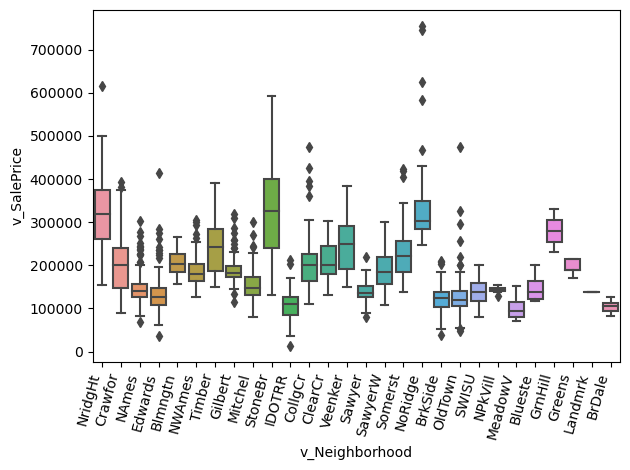

In [3]:
sns.boxplot(x='v_Neighborhood', y='v_SalePrice', data=housing_df)

plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

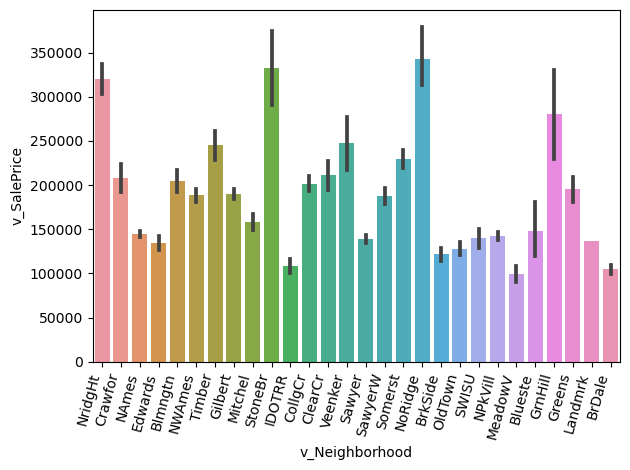

In [4]:
sns.barplot(x='v_Neighborhood', y='v_SalePrice', data=housing_df)

plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

- The graph below shows the relationship between sales price and the rates of the overall material and finish of the house. I thought it was interesting how closely correlated the two seemed withing the graph. As the quality of the homes went up, the sales price also increased, with 10's showing the highest and 1's showing the lowest.

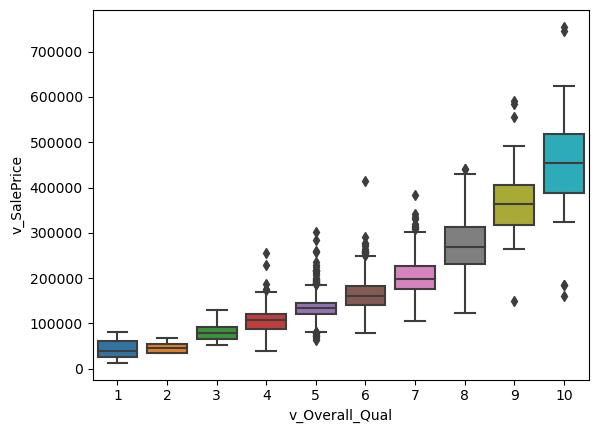

In [5]:
sns.boxplot(x='v_Overall_Qual', y='v_SalePrice', data=housing_df)
plt.show()

- The graph below shows the relationship between sales price and rating of the overall condition of the house. What I found interesting is that it seemed as if condition had no correlation with the sales price. Homes that had a higher rating didn't differ too much in sales price from those with a lower rating.

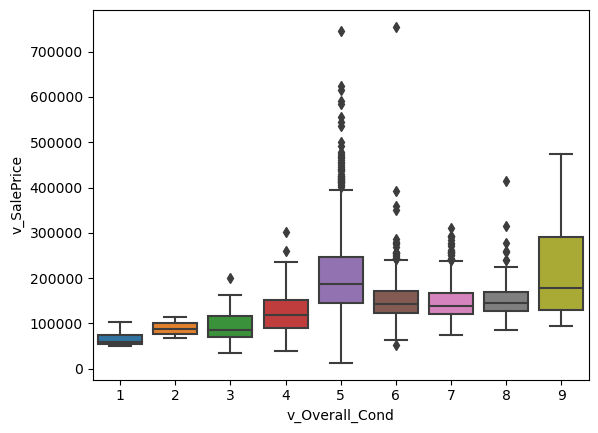

In [6]:
sns.boxplot(x='v_Overall_Cond', y='v_SalePrice', data=housing_df)
plt.show()

## Part 2: Running Regressions

**Run these regressions on the RAW data, even if you found data issues that you think should be addressed.**

_Insert cells as needed below to run these regressions. Note that $i$ is indexing a given house, and $t$ indexes the year of sale._ 

1. $\text{Sale Price}_{i,t} = \alpha + \beta_1 * \text{v_Lot_Area}$
1. $\text{Sale Price}_{i,t} = \alpha + \beta_1 * log(\text{v_Lot_Area})$
1. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * \text{v_Lot_Area}$
1. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * log(\text{v_Lot_Area})$
1. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * \text{v_Yr_Sold}$
1. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * (\text{v_Yr_Sold==2007})+ \beta_2 * (\text{v_Yr_Sold==2008})$
1. Choose your own adventure: Pick any five variables from the dataset that you think will generate good R2. Use them in a regression of $log(\text{Sale Price}_{i,t})$ 
    - Tip: You can transform/create these five variables however you want, even if it creates extra variables. For example: I'd count Model 6 above as only using one variable: `v_Yr_Sold`.
    - I got an R2 of 0.877 with just "5" variables. How close can you get? I won't be shocked if someone beats that!
    

**Bonus formatting trick:** Instead of reporting all regressions separately, report all seven regressions in a _single_ table using `summary_col`.


1. $\text{Sale Price}_{i,t} = \alpha + \beta_1 * \text{v_Lot_Area}$ :

In [7]:
reg1 = sm_ols('v_SalePrice ~ v_Lot_Area', data = housing_df).fit()

2. $\text{Sale Price}_{i,t} = \alpha + \beta_1 * log(\text{v_Lot_Area})$ :

In [8]:
reg2 = sm_ols('v_SalePrice ~ np.log(v_Lot_Area)', data = housing_df).fit()

3. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * \text{v_Lot_Area}$ :

In [9]:
reg3 = sm_ols('np.log(v_SalePrice) ~ v_Lot_Area', data = housing_df).fit()

4. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * log(\text{v_Lot_Area})$ :

In [10]:
reg4 = sm_ols('np.log(v_SalePrice) ~ np.log(v_Lot_Area)', data = housing_df).fit()

5. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * \text{v_Yr_Sold}$

In [11]:
reg5 =  sm_ols('np.log(v_SalePrice) ~ v_Yr_Sold', data = housing_df).fit()

6. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * (\text{v_Yr_Sold==2007})+ \beta_2 * (\text{v_Yr_Sold==2008})$

In [12]:
reg6 = sm_ols('np.log(v_SalePrice) ~ v_Yr_Sold==2007 + v_Yr_Sold==2008 ', data = housing_df).fit()

7. Choose your own adventure: Pick any five variables from the dataset that you think will generate good R2. Use them in a regression of $log(\text{Sale Price}_{i,t})$ : 

In [13]:
reg7 = sm_ols('np.log(v_SalePrice) ~ v_Garage_Cars + v_Gr_Liv_Area + v_Overall_Qual + v_Bldg_Type=="1Fam"+ v_Bldg_Type=="TwnhsE" + v_Neighborhood=="NoRidge"+ v_Neighborhood=="NridgHt"+ v_Neighborhood=="StoneBR"', data = housing_df).fit()

In [14]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'Adj R-squared' : lambda x: f"{x.rsquared_adj:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

print(summary_col(results=[reg1,reg2,reg3,reg4,reg5,reg6,reg7], # list the result obj here
                  float_format='%0.2f',
                  stars = True, # stars are easy way to see if anything is statistically significant
                  model_names=['Reg 1','Reg 2',' Reg 3','Reg 4','Reg 5','Reg 6','Reg 7',], # these are bad names, lol. Usually, just use the y variable name
                  info_dict=info_dict
     )
     )


                                       Reg 1         Reg 2       Reg 3   Reg 4   Reg 5   Reg 6    Reg 7  
---------------------------------------------------------------------------------------------------------
Intercept                           154789.55*** -327915.80*** 11.89*** 9.41*** 22.29   12.02*** 10.51***
                                    (2911.59)    (30221.35)    (0.01)   (0.15)  (22.94) (0.02)   (0.02)  
R-squared                           0.07         0.13          0.06     0.13    0.00    0.00     0.80    
R-squared Adj.                      0.07         0.13          0.06     0.13    -0.00   0.00     0.80    
np.log(v_Lot_Area)                               56028.17***            0.29***                          
                                                 (3315.14)              (0.02)                           
v_Bldg_Type == "1Fam"[T.True]                                                                    0.12*** 
                                             

## Part 3: Regression interpretation

_Insert cells as needed below to answer these questions. Note that $i$ is indexing a given house, and $t$ indexes the year of sale._ 

1. If you didn't use the `summary_col` trick, list $\beta_1$ for Models 1-6 to make it easier on your graders.
1. Interpret $\beta_1$ in Model 2. 
1. Interpret $\beta_1$ in Model 3. 
    - HINT: You might need to print out more decimal places. Show at least 2 non-zero digits. 
1. Of models 1-4, which do you think best explains the data and why?
1. Interpret $\beta_1$ In Model 5
1. Interpret $\alpha$ in Model 6
1. Interpret $\beta_1$ in Model 6
1. Why is the R2 of Model 6 higher than the R2 of Model 5?
1. What variables did you include in Model 7?
1. What is the R2 of your Model 7?
1. Speculate (not graded): Could you use the specification of Model 6 in a predictive regression? 
1. Speculate (not graded): Could you use the specification of Model 5 in a predictive regression? 


## 2. Interpret $\beta_1$ in Model 2: 
- The beta coefficient is around 56028.17 with a standard error of 3315.14, meaning a one unit increase in the natural log of the lot area is associated with an average increase of 56028.17 dollars in the sale price.

## 3. Interpret $\beta_1$ in Model 3:
- HINT: You might need to print out more decimal places. Show at least 2 non-zero digits. 
- In Model 3, the coefficient of v_Lot_Area is equal to .2900, meaning that a 1% increase in lot area of a property is associated with .29% increase in the sales price of the property.

## 4. Of models 1-4, which do you think best explains the data and why?
- I personally believe that Model 4  explains the data the best. The adjusted R-square of model 4 is the highest among all the models, meaning the model explains the largest proportion of variation in sale price. The coefficient of the predictor variable is .05, meaning that it has a significant effect on sale price. In this model as well both the log of lot area and sales price are taken which makes it easier to interpret. For every 1% increase in Lot Area, Sale Price increases by a certain percentage as determined by the coefficient.

## 5. Interpret $\beta_1$ In Model 5:
- In Model 5 the coefficient variable of year sold is -.01, meaning that for each increase in the year of sale, the natural log of the sale price decreases by around .01. 

## 6. Interpret $\alpha$ in Model 6:
- In Model 6, the intercept is 12.02, representing the expected value of the log of the housing sale price when other variables in the model are equal to zero. We can interpret the intercept as the average log of the sale price for houses in the dataset.


## 7. Interpret $\beta_1$ in Model 6:
- In Model 6 the coefficient represents the difference in the expected log of sale price between the years 2007 and 2008. If beta is positive it means the expected log of sale price in 2007 is higher than 2008. If it's negative that means the expected log of sale price is lower in 2007 than 2008.

## 8. Why is the R2 of Model 6 higher than the R2 of Model 5?
- In Model 6, the independent variables are v_Yr_Sold==2007 and v_Yr_Sold==2008, which are binary variables. These variables capture more specific information than just the singular independent variable of v_Yr_sold in model 5.


## 9. What variables did you include in Model 7?
- In my Model 7, I included 5 variables consisting of v_Garage_Cars, v_Gr_Liv_Area, v_Overall_Qual, v_Bldg_Type=='1Fam', v_Bldg_Type=='TwnhsE', v_Neighborhood=='NoRidge', v_Neighborhood=='NridgHt', and v_Neighborhood=='StoneBR'. I believed that these variables would have a strong impact on the R2 of the regression model, as when looking at the data model they all contributed to a high sales price.

## 10. What is the R2 of your Model 7?
- The R2 of my model is around .80


## 11. Speculate (not graded): Could you use the specification of Model 6 in a predictive regression?
- No, I don't believe that you could use Model 6,  its intercept is statistically meaningful. However, the R-square of Model 6 is only 0 which suggest that the model is not a good fit for the data. Also the two binary variables may not sufficiently capture all the complexity of the housing market and accurately predict sales price.

## 12. Speculate (not graded): Could you use the specification of Model 5 in a predictive regression?
- I believe that you could possibly use Model 5 in a predictive regression as the independent variable covers far more data than model 6. However, similarly to Model 6, the R-squared is equal to 0 indicating the model does not explain much of the variation in the data.